In [1]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/survey_results_public.csv')
df.shape

(83439, 48)

In [3]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
pd.set_option('display.max_columns',48)

## Dataframe Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Loading in schema csv file to see what some of the columns actually mean

In [6]:
schemaDf = pd.read_csv('data/survey_results_schema.csv')
schemaDf.head(10)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


The dataframe above shows the corresponding question to each column in the main dataframe. However, there are entries which aren't questions at all. I.e: indexes 0,1,8 among others. <br>
Dropping those entries:


In [7]:
# Applying filter
pattern = r'S\d'
filt = schemaDf['qname'].str.contains(pattern)
schemaDf = schemaDf[~filt]

In [8]:
schemaDf.drop(columns=['qid'],inplace=True)

In [9]:
schemaDf.set_index('qname',inplace=True)
schemaDf.sort_index(inplace=True)

In [10]:
schemaDf = schemaDf.style.set_properties(subset='question',**{'width': '300px' })

In [11]:
schemaDf

,question,force_resp,type,selector
qname,,,,
Accessibility,"Which of the following describe you, if any? Please check all that apply.",False,MC,MAVR
Age,What is your age?,False,MC,MAVR
Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)",False,MC,MAVR
CompFreq,"Is that compensation weekly, monthly, or yearly?",False,MC,MAVR
CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.",False,TE,SL
Country,Where do you live? *,True,MC,DL
Currency,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *",True,MC,SB
Database,"Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)",False,Matrix,Likert
DevType,Which of the following describes your current job? Please select all that apply.,False,MC,MAVR


# Okay, looks a bit better now. Back to the main dataframe:

### Why do people code?

In [12]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

#### Lets see how this looks like in a pie chart

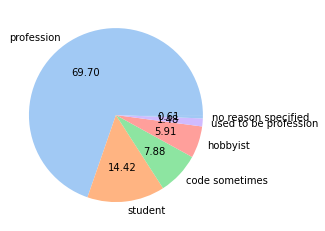

In [13]:
colors = sns.color_palette('pastel')[0:5]
labels=['profession','student','code sometimes','hobbyist','used to be profession','no reason specified']

plt.pie(df['MainBranch'].value_counts(),colors=colors,labels=labels,autopct='%.2f')
print()